In [1]:
## Rating of cereals
data = read.csv("cereals.csv", header=T) # Read the Data
samplesize = 0.60 * nrow(data) # Random sampling
set.seed(80)


In [35]:
data

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.50954
Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.17409
Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.03856
Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.12025
Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.31381


In [2]:
index = sample( seq_len ( nrow ( data ) ), size = samplesize )

In [3]:
# Create training and test set
datatrain = data[ index, ]


In [4]:
datatest = data[ -index, ]

In [6]:
## Scale data for neural network
max = apply(data , 2 , max)
min = apply(data, 2 , min)

In [11]:
summary(data)

                        name    mfr    type      calories        protein     
 100% Bran                : 1   A: 1   C:74   Min.   : 50.0   Min.   :1.000  
 100% Natural Bran        : 1   G:22   H: 3   1st Qu.:100.0   1st Qu.:2.000  
 All-Bran                 : 1   K:23          Median :110.0   Median :3.000  
 All-Bran with Extra Fiber: 1   N: 6          Mean   :106.9   Mean   :2.545  
 Almond Delight           : 1   P: 9          3rd Qu.:110.0   3rd Qu.:3.000  
 Apple Cinnamon Cheerios  : 1   Q: 8          Max.   :160.0   Max.   :6.000  
 (Other)                  :71   R: 8                                         
      fat            sodium          fiber            carbo     
 Min.   :0.000   Min.   :  0.0   Min.   : 0.000   Min.   :-1.0  
 1st Qu.:0.000   1st Qu.:130.0   1st Qu.: 1.000   1st Qu.:12.0  
 Median :1.000   Median :180.0   Median : 2.000   Median :14.0  
 Mean   :1.013   Mean   :159.7   Mean   : 2.152   Mean   :14.6  
 3rd Qu.:2.000   3rd Qu.:210.0   3rd Qu.: 3.000   3

In [26]:
sum(is.na(data$rating))

[1] 0

In [29]:
install.packages('dplyr')

also installing the dependencies 'fansi', 'pkgconfig', 'purrr', 'cli', 'utf8', 'ellipsis', 'generics', 'glue', 'lifecycle', 'magrittr', 'R6', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
fansi   0.4.2  0.5.0              TRUE
tibble  3.1.1  3.1.2              TRUE
pillar  1.6.0  1.6.1             FALSE

  Binaries will be installed
package 'fansi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tibble' succe

installing the source package 'pillar'



In [38]:
library(dplyr)
vars_scale <- data %>% 
  select_if(is.numeric) %>% 
  colnames()

In [39]:
scaled1 <- function(x) scale(x, center = min(x), scale = max(x) - min(x))


In [40]:
scaled = data %>% 
  mutate_at(vars_scale, scaled1)

In [42]:
scaled

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,0.1818182,0.6,0.2,0.406250,0.71428571,0.2500000,0.4375,0.84894260,0.25,1.0,0.50,0.064,0.66559279
100% Natural Bran,Q,C,0.6363636,0.4,1.0,0.046875,0.14285714,0.3750000,0.5625,0.41087613,0.00,1.0,0.50,0.600,0.21068456
All-Bran,K,C,0.1818182,0.6,0.2,0.812500,0.64285714,0.3333333,0.3750,0.96978852,0.25,1.0,0.50,0.064,0.54694061
All-Bran with Extra Fiber,K,C,0.0000000,0.6,0.0,0.437500,1.00000000,0.3750000,0.0625,1.00000000,0.25,1.0,0.50,0.200,1.00000000
Almond Delight,R,C,0.5454545,0.2,0.4,0.625000,0.07142857,0.6250000,0.5625,0.00000000,0.25,1.0,0.50,0.400,0.21598661
Apple Cinnamon Cheerios,G,C,0.5454545,0.2,0.4,0.562500,0.10714286,0.4791667,0.6875,0.21450151,0.25,0.0,0.50,0.400,0.15155138
Apple Jacks,K,C,0.5454545,0.2,0.0,0.390625,0.07142857,0.5000000,0.9375,0.09365559,0.25,0.5,0.50,0.600,0.19998455
Basic 4,G,C,0.7272727,0.4,0.4,0.656250,0.14285714,0.7916667,0.5625,0.30513595,0.25,1.0,0.83,0.400,0.25105992
Bran Chex,R,C,0.3636364,0.2,0.2,0.625000,0.28571429,0.6666667,0.4375,0.38066465,0.25,0.0,0.50,0.336,0.41073956
Bran Flakes,P,C,0.3636364,0.4,0.0,0.656250,0.35714286,0.5833333,0.3750,0.57703927,0.25,1.0,0.50,0.336,0.46616444


In [44]:
install.packages('neuralnet')

also installing the dependencies 'MASS', 'Deriv'



package 'MASS' successfully unpacked and MD5 sums checked
package 'Deriv' successfully unpacked and MD5 sums checked
package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shrestha\AppData\Local\Temp\Rtmp0UTt1b\downloaded_packages


In [45]:
library(neuralnet) # load library

Warning message:
"package 'neuralnet' was built under R version 3.6.3"
Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute



In [46]:
# creating training and test set
trainNN = scaled[index , ]
testNN = scaled[-index , ]


In [47]:
# fit neural network
set.seed(2)
NN = neuralnet(rating ~ calories + protein + fat + sodium + fiber, trainNN, hidden = 3 , linear.output = T )


In [53]:
NN

$call
neuralnet(formula = rating ~ calories + protein + fat + sodium + 
    fiber, data = trainNN, hidden = 3, linear.output = T)

$response
       rating
11 0.00000000
43 0.11487480
31 0.22745340
65 0.74581762
50 0.29935041
36 0.05059922
8  0.25105992
4  1.00000000
13 0.02353520
35 0.36701174
54 0.31007203
9  0.41073956
61 0.49285323
40 0.24356541
38 0.14141252
7  0.19998455
76 0.44341036
53 0.26166011
33 0.44981653
72 0.37820795
25 0.18721048
34 0.46692035
44 0.48647982
55 0.56452680
32 0.07614374
6  0.15155138
52 0.16399225
23 0.23966232
18 0.23446282
59 0.28040931
41 0.28017031
77 0.23981250
73 0.27838685
27 0.53266181
48 0.29160075
71 0.13943493
17 0.36769383
69 0.54612763
19 0.05754089
29 0.30362167
47 0.16217507
26 0.17701239
2  0.21068456
63 0.29760368
57 0.41591549
58 0.43331546

$covariate
    calories protein fat   sodium      fiber
11 0.6363636     0.0 0.4 0.687500 0.00000000
43 0.5454545     0.2 0.2 0.562500 0.00000000
31 0.4545455     0.2 0.0 0.140625 0.00000000
65 0.3636

In [52]:
plot(NN) 


In [66]:
testNN[,c(4:16)]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,0.1818182,0.6,0.2,0.406250,0.71428571,0.2500000,0.4375,0.84894260,0.25,1.0,0.50,0.064,0.66559279
3,0.1818182,0.6,0.2,0.812500,0.64285714,0.3333333,0.3750,0.96978852,0.25,1.0,0.50,0.064,0.54694061
5,0.5454545,0.2,0.4,0.625000,0.07142857,0.6250000,0.5625,0.00000000,0.25,1.0,0.50,0.400,0.21598661
10,0.3636364,0.4,0.0,0.656250,0.35714286,0.5833333,0.3750,0.57703927,0.25,1.0,0.50,0.336,0.46616444
12,0.5454545,1.0,0.4,0.906250,0.14285714,0.7500000,0.1250,0.32024169,0.25,0.0,0.50,0.800,0.43247762
14,0.5454545,0.4,0.4,0.437500,0.14285714,0.5833333,0.5000,0.32024169,0.25,1.0,0.50,0.200,0.29548966
15,0.5454545,0.0,0.2,0.562500,0.00000000,0.5416667,0.8750,0.16918429,0.25,0.5,0.50,0.600,0.06203367
16,0.5454545,0.2,0.0,0.875000,0.00000000,0.9583333,0.2500,0.07854985,0.25,0.0,0.50,0.600,0.30929858
20,0.5454545,0.4,0.6,0.437500,0.28571429,0.4583333,0.5000,0.48640483,0.25,1.0,0.50,0.200,0.29613152
21,0.4545455,0.4,0.0,0.250000,0.07142857,0.9166667,0.0625,0.00000000,0.00,0.5,0.50,0.600,0.61445544


In [67]:
predict_testNN = compute(NN, testNN[,c(4:16)])


In [68]:
predict_testNN = (predict_testNN$net.result * (max(data$rating) - min(data$rating))) + min(data$rating)

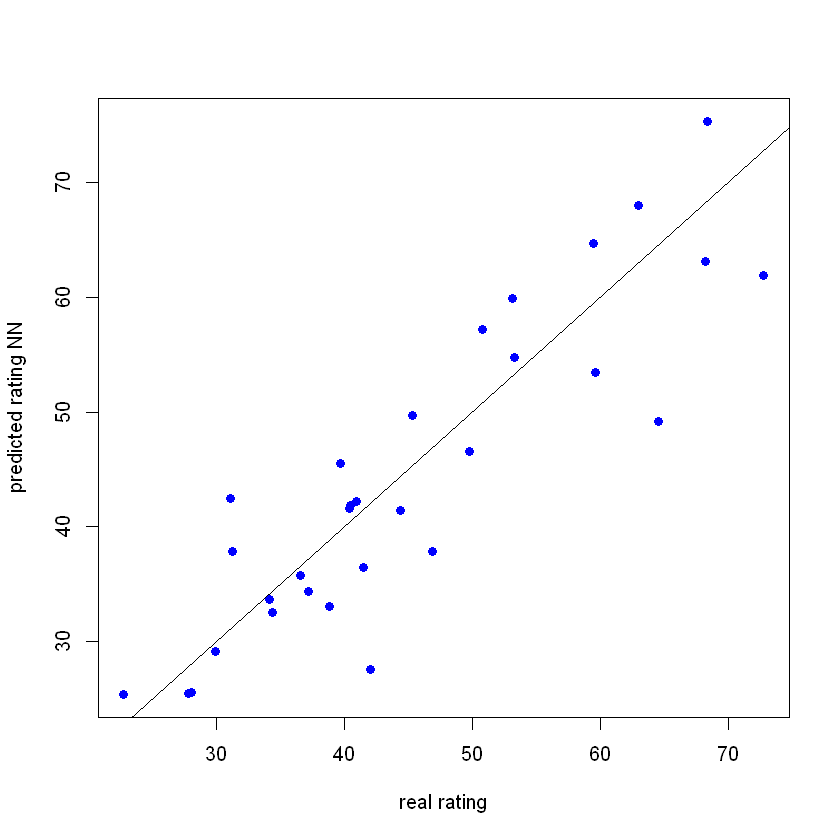

In [69]:
plot(datatest$rating, predict_testNN, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")
abline(0,1)


In [71]:
RMSE.NN = (sum((datatest$rating-predict_testNN)^2)/nrow(datatest))^ 0.5

In [73]:
install.packages('boot')

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shrestha\AppData\Local\Temp\Rtmp0UTt1b\downloaded_packages


In [75]:
install.packages('plyr')

package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shrestha\AppData\Local\Temp\Rtmp0UTt1b\downloaded_packages


In [76]:
library(boot)
library(plyr)


Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [77]:
set.seed(50)
k = 100
RMSE.NN = NULL
List = list()


In [79]:
for(j in 10:65){
    for (i in 1:k) {
        index = sample(1:nrow(data),j )
        trainNN = scaled[index,]
        testNN = scaled[-index,]
        datatest = data[-index,]
        NN = neuralnet(rating ~ calories + protein + fat + sodium + fiber, trainNN, hidden = 3, linear.output= T)
        predict_testNN = compute(NN,testNN[,c(4:16)])
        predict_testNN = (predict_testNN$net.result*(max(data$rating)-min(data$rating)))+min(data$rating)
        RMSE.NN [i]<- (sum((datatest$rating - predict_testNN)^2)/nrow(datatest))^0.5
    }
List[[j]] = RMSE.NN
}
Matrix.RMSE = do.call(cbind, List)


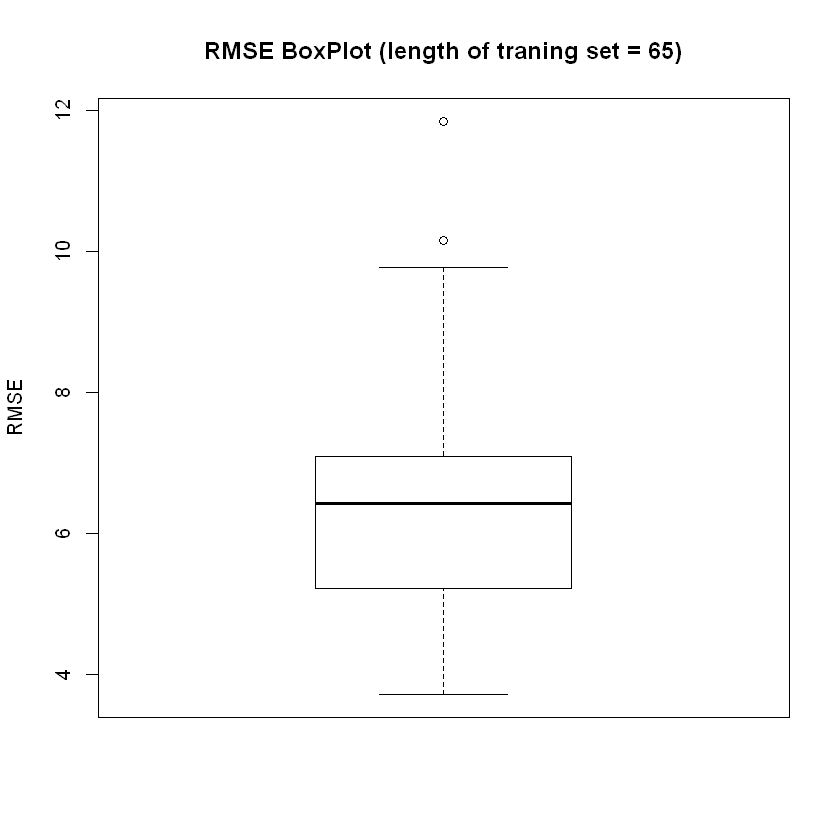

In [80]:
boxplot(Matrix.RMSE[,56], ylab = "RMSE", main = "RMSE BoxPlot (length of traning set = 65)")


  There is a binary version available but the source version is later:
            binary source needs_compilation
matrixStats 0.58.0 0.59.0              TRUE

  Binaries will be installed
package 'matrixStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shrestha\AppData\Local\Temp\Rtmp0UTt1b\downloaded_packages


Warning message:
"package 'matrixStats' was built under R version 3.6.3"
Attaching package: 'matrixStats'

The following object is masked from 'package:plyr':

    count

The following object is masked from 'package:dplyr':

    count



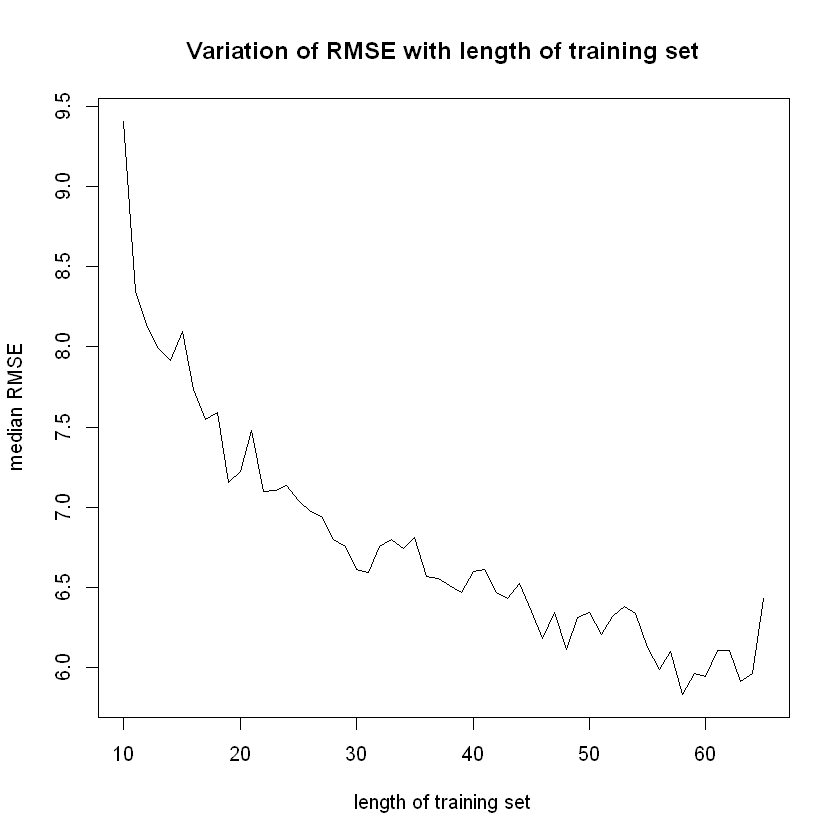

In [81]:
## Variation of median RMSE 
install.packages("matrixStats")
library(matrixStats)
med = colMedians(Matrix.RMSE)
X = seq(10,65)
plot (med~X, type = "l", xlab = "length of training set", ylab = "median RMSE", main = "Variation of RMSE with length of training set")
